# Insurance Dataset EDA

Importing Libraries

In [ ]:
import sys
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
# Adjust the path to point to your scripts folder relative to the notebook
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
from scripts.data_loader import load_data
from scripts.plotter import Plotter


Loading Dataset

In [3]:
df = load_data('/Users/elbethelzewdie/Documents/insurance-risk-analytics-week3/insurance-risk-analytics-week3/data/MachineLearningRating_v3.txt')
df.info()

/Users/elbethelzewdie/Documents/insurance-risk-analytics-week3/insurance-risk-analytics-week3/scripts/data_loader.py:14: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path, sep=delimiter)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [4]:
df.head(5)

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## Statistical Summary for Numeric Columns

- Total premium and total claims show high skewness and extreme outliers, with median values far below the mean, suggesting that most customers have very low premiums or claims, but a small subset experiences very high values. Negative values should be investigated for potential data errors.

In [5]:
df.describe() 

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


## Data Structure

Numerical Columns

- The dataset contain 15 numerical columns.


In [6]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

Index(['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode',
       'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts',
       'NumberOfDoors', 'CustomValueEstimate', 'NumberOfVehiclesInFleet',
       'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


Categorical Columns

- The dataset contain 37 categorical columns.

In [7]:
Categorical_cols = df.select_dtypes(include=['object']).columns
print(Categorical_cols)

Index(['TransactionMonth', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make',
       'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType'],
      dtype='object')


## Data Quality Assessment

Checking for Missing Values

- Many columns in the dataset contain missing values. In particular, the NumberOfVehiclesInFleet column consists entirely of null values, making it the column with the largest amount of missing data.

In [8]:
print(df.isnull().sum())

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

Initialize the plotter

In [9]:
plotter = Plotter()

## Univariate Analysis

For numerical columns

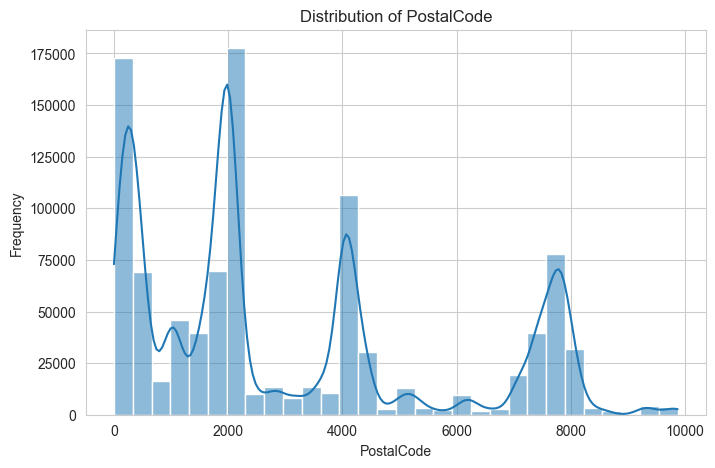

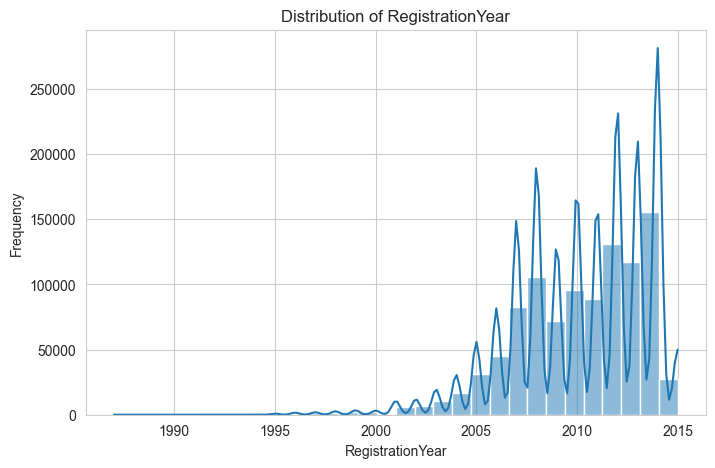

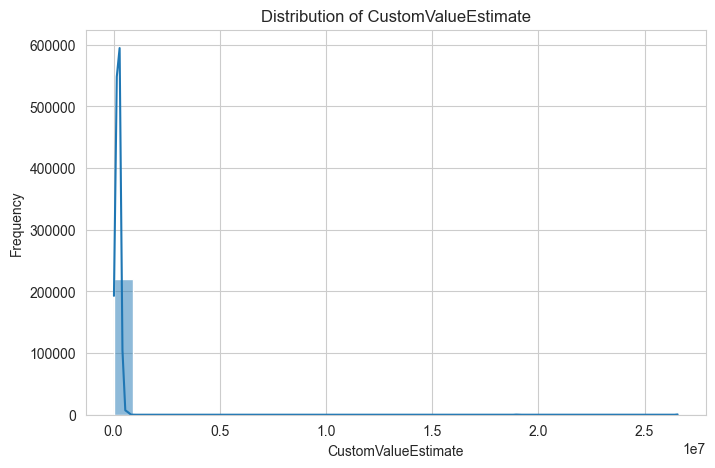

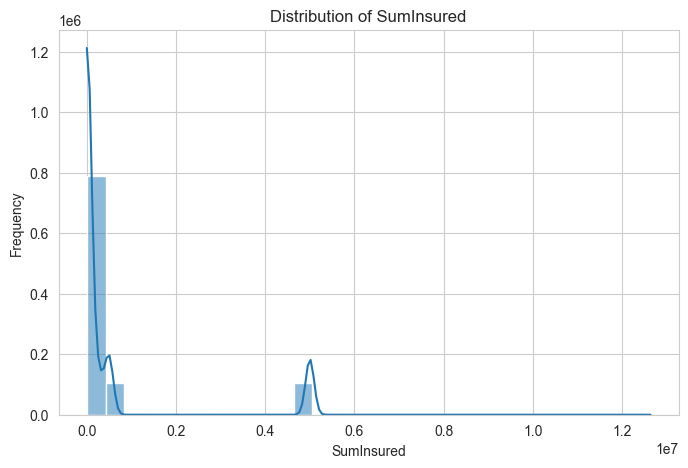

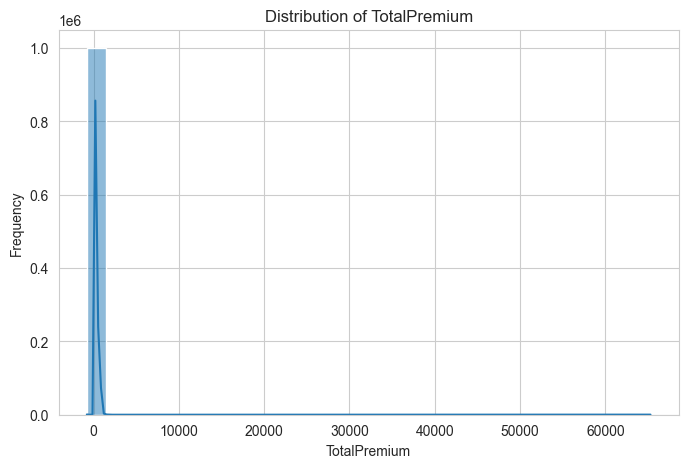

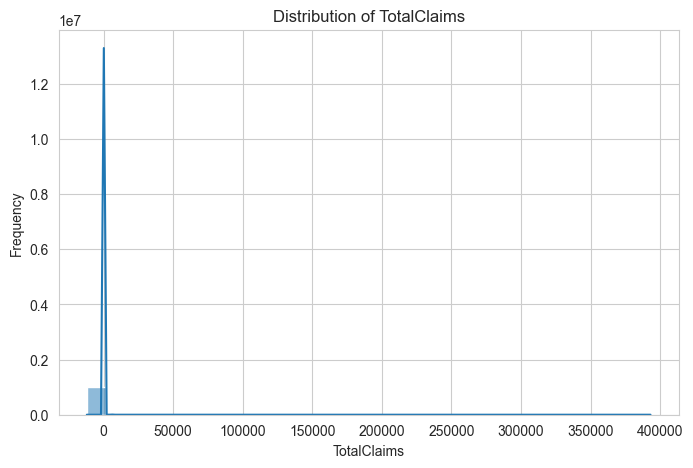

In [10]:
# Define numerical columns for histogram plotting
numerical_col = ['PostalCode', 'RegistrationYear', 'CustomValueEstimate', 'SumInsured', 'TotalPremium', 'TotalClaims']

# Loop through numeric columns
for col in numerical_col:
    plotter.histogram(df, column=col, bins=30, title=f'Distribution of {col}')

For categorical columns

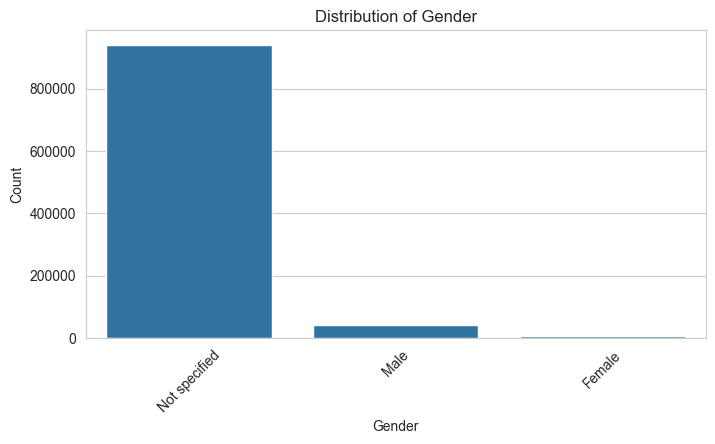

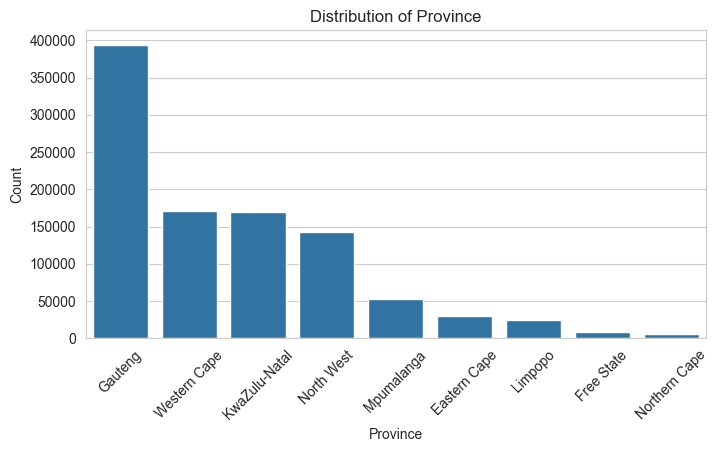

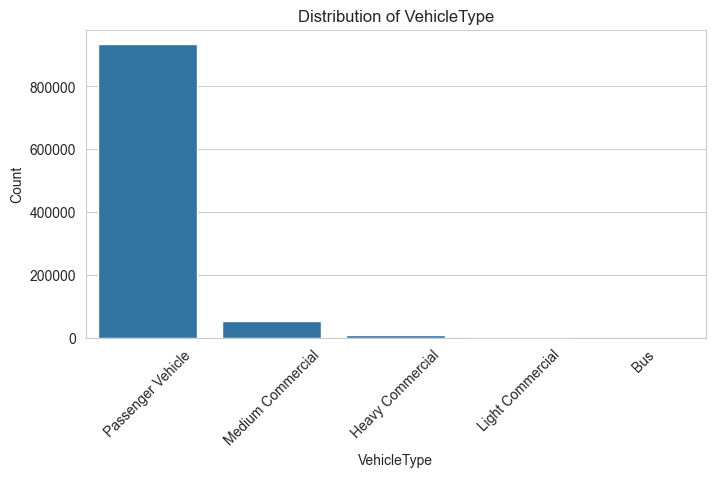

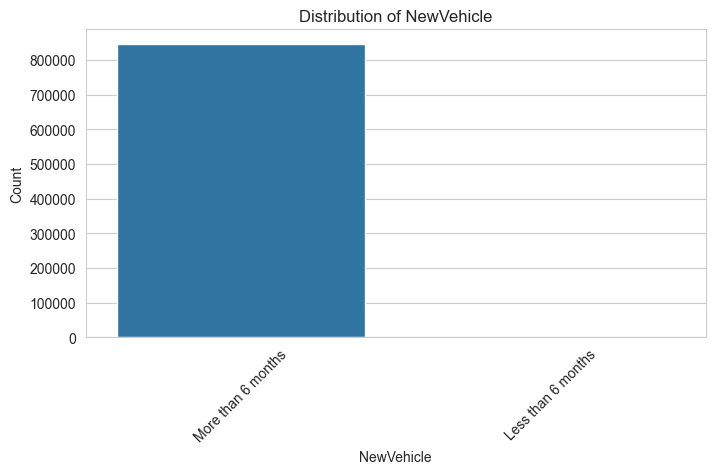

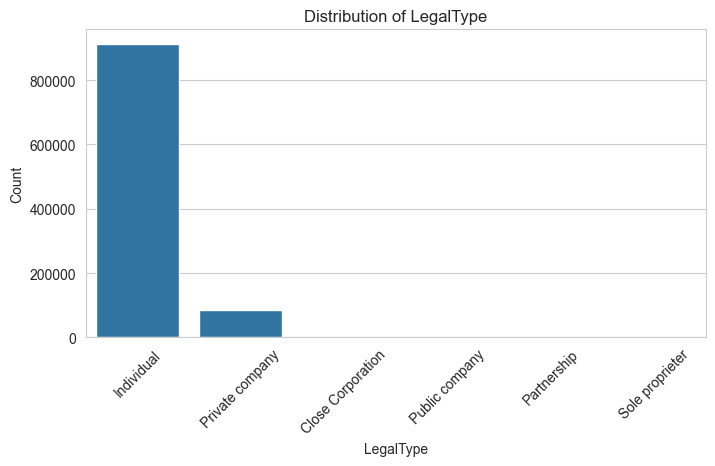

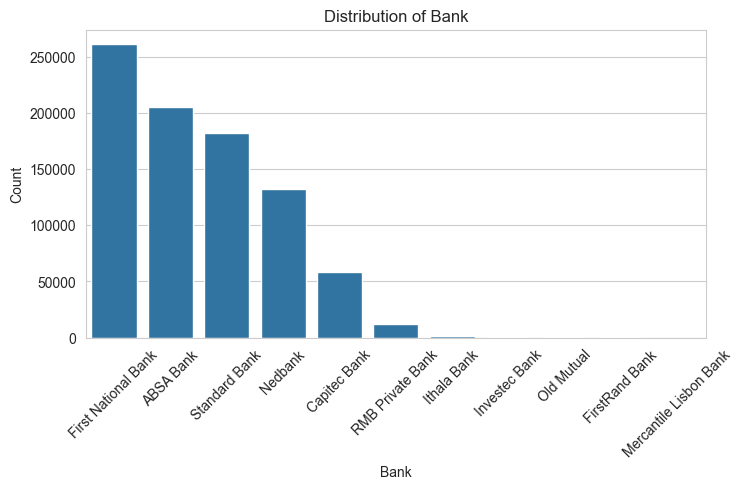

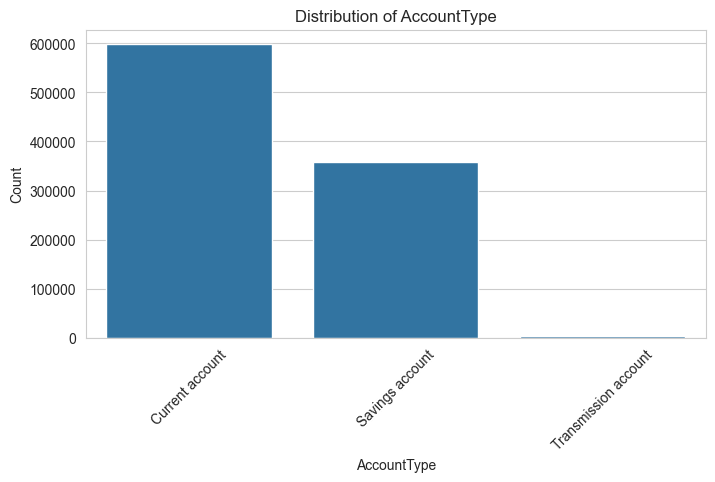

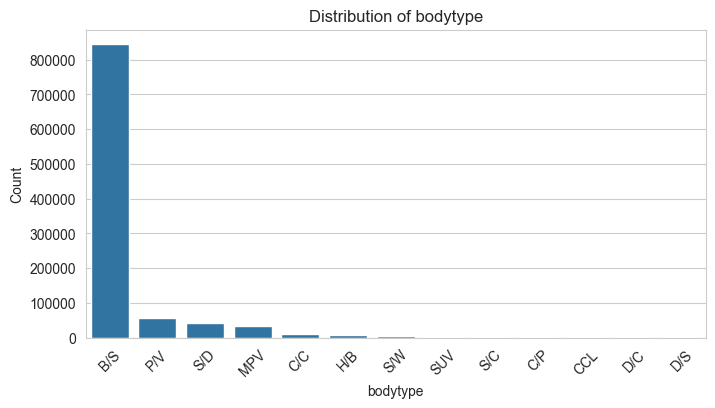

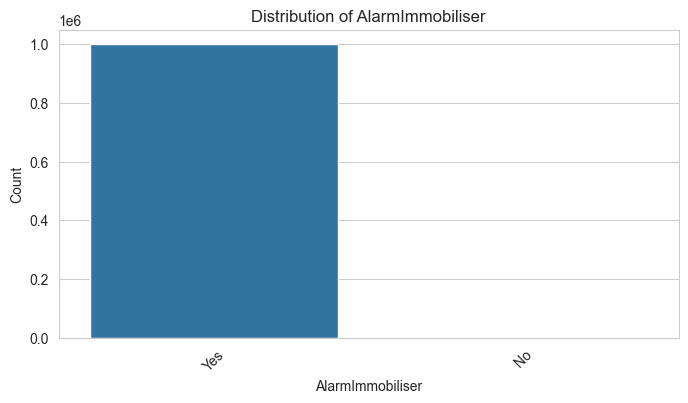

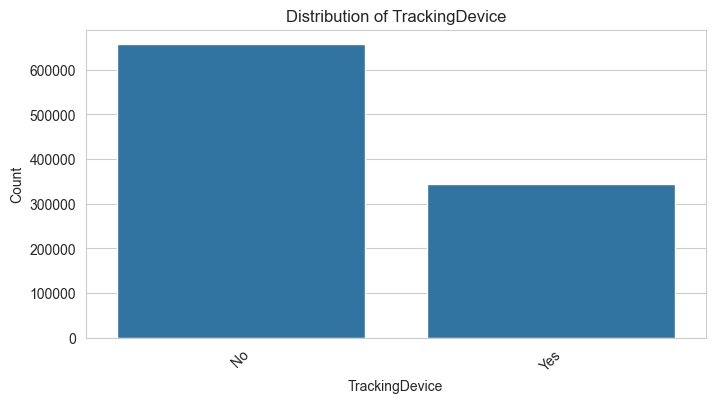

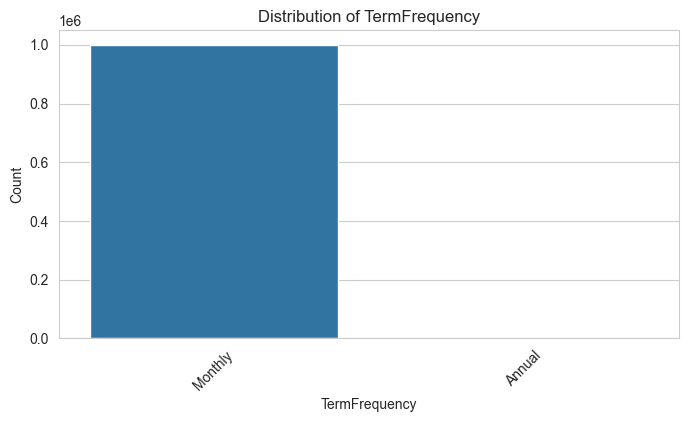

In [12]:
# Define categorical columns for count plot
categorical_col = ['Gender', 'Province', 'VehicleType', 'NewVehicle', 'LegalType', 'Bank', 'AccountType', 'bodytype', 'AlarmImmobiliser', 'TrackingDevice', 'TermFrequency' ]

# Loop through categorical columns
for col in categorical_col:
    plotter.count_plot(data=df, column=col, title=f'Distribution of {col}')

Bivariate Analysis

- Most policies with low premiums generate highly unpredictable claims, and the lack of a trend indicates that premiums may not be aligned with actual risk.

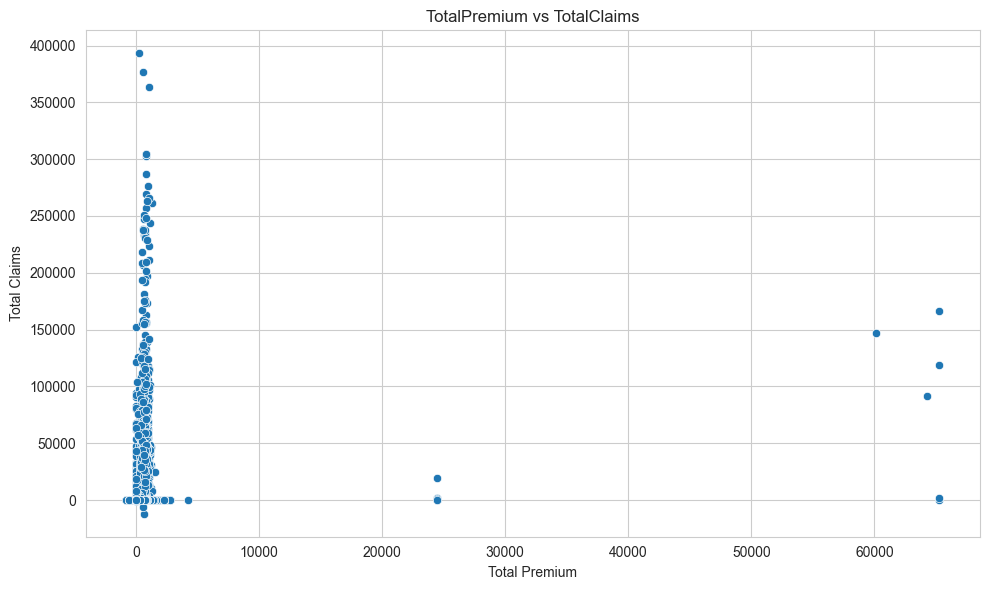

In [13]:
# Scatter plot for all data (overall relationship)
plotter.scatter_plot(
    data=df,
    x='TotalPremium',
    y='TotalClaims',
    title='TotalPremium vs TotalClaims',
    xlabel='Total Premium',
    ylabel='Total Claims'
)

Multivariate Analysis

- Even by ZipCode, there is no clear geographic pattern—claims vary widely everywhere except a few high-premium policies in ZipCode 21.

/Users/elbethelzewdie/Documents/insurance-risk-analytics-week3/insurance-risk-analytics-week3/scripts/plotter.py:53: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


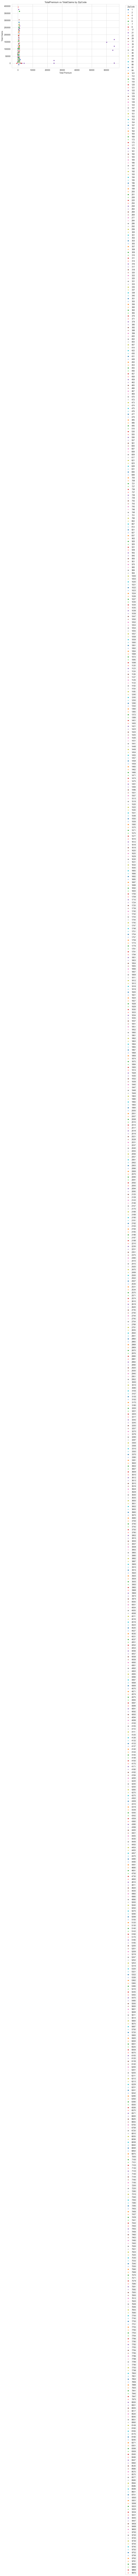

In [14]:
plotter.scatter_plot(
    data=df,
    x='TotalPremium',
    y='TotalClaims',
    hue='PostalCode',
    palette='tab20',
    title='TotalPremium vs TotalClaims by ZipCode',
    xlabel='Total Premium',
    ylabel='Total Claims',
    legend_title='ZipCode'
)

- There is almost no linear relationship between how much premium customers pay and how much they claim, meaning premiums do not reflect the actual risk in this dataset.

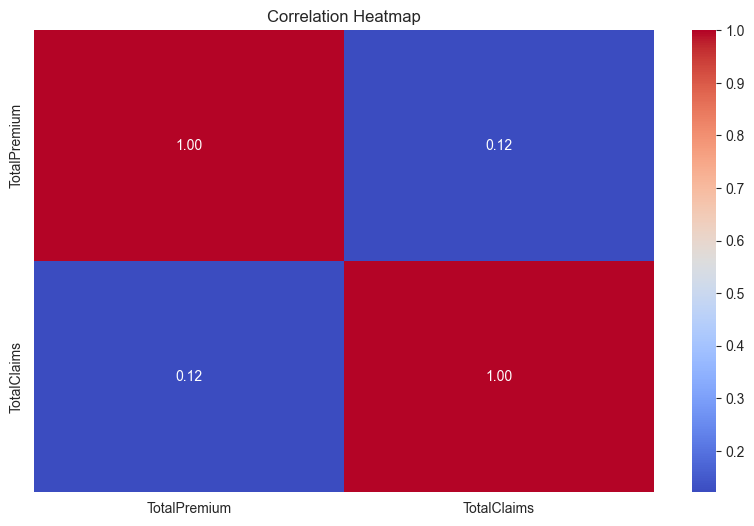

In [15]:
numeric_cols = ['TotalPremium', 'TotalClaims']
plotter.heatmap(df[numeric_cols])

- Some areas show very high claim losses and risk exposure, others are relatively balanced, while a few regions remain low-risk and highly profitable.

In [16]:
geo_summary = df.groupby('PostalCode').agg({
    'TotalPremium': 'sum',        # total premium per region
    'TotalClaims': 'sum',         # total claims per region
    'CoverType': lambda x: x.value_counts().index[0],  # most common cover type
    'make': lambda x: x.value_counts().index[0]    # most common car make
}).reset_index()

print(geo_summary.head())

   PostalCode   TotalPremium    TotalClaims        CoverType    make
0           1  273035.326595  307583.342105      Third Party  TOYOTA
1           2   60861.729133   61885.298246       Windscreen  TOYOTA
2           4    8773.975714       0.000000  Keys and Alarms  TOYOTA
3           5   24661.450526   82951.526316       Windscreen  TOYOTA
4           6   22260.230088    8628.596491       Windscreen     CMC


- There are 888 unique PostalCodes.

In [17]:
df['PostalCode'].nunique()

888

- The most frequently purchased covers are Own Damage, Passenger Liability, and Windscreen, while specialized covers like Keys and Alarms or cleaning-related services appear slightly less common but still widely used. The coverType contains 22 unique category.

In [18]:
df['CoverType'].value_counts()

CoverType
Own Damage                                             104183
Passenger Liability                                    104158
Windscreen                                             103763
Third Party                                            102825
Keys and Alarms                                        102428
Signage and Vehicle Wraps                              102416
Emergency Charges                                      102416
Cleaning and Removal of Accident Debris                102414
Income Protector                                        64813
Basic Excess Waiver                                     57769
Accidental Death                                        27321
Credit Protection                                       18070
Roadside Assistance                                      3834
Deposit Cover                                            1299
Asset Value Preserver                                     865
Standalone passenger liability                            54

## Outlier Detection

- Several numerical variables exhibit substantial outliers, suggesting the presence of extreme values that may influence statistical summaries and model performance.
- Both TotalPremium and TotalClaims contain outliers, indicating extreme values in these variables.

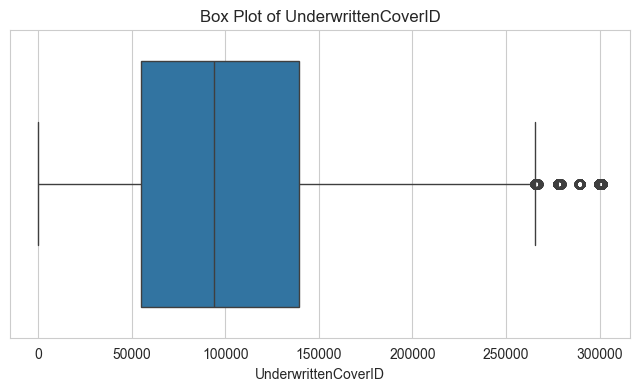

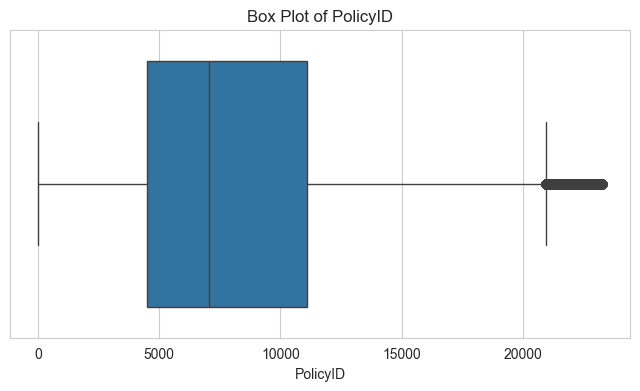

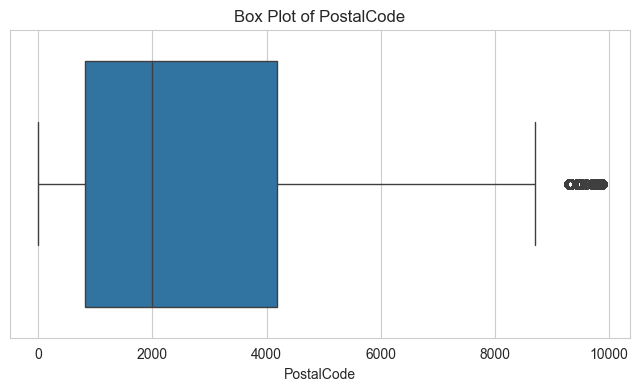

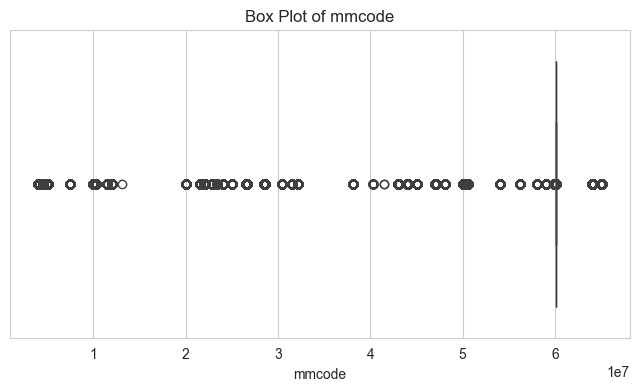

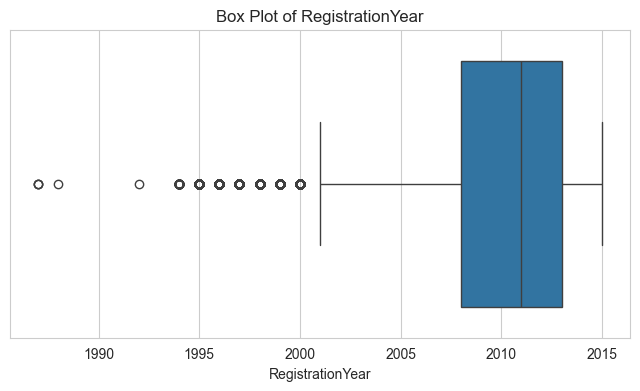

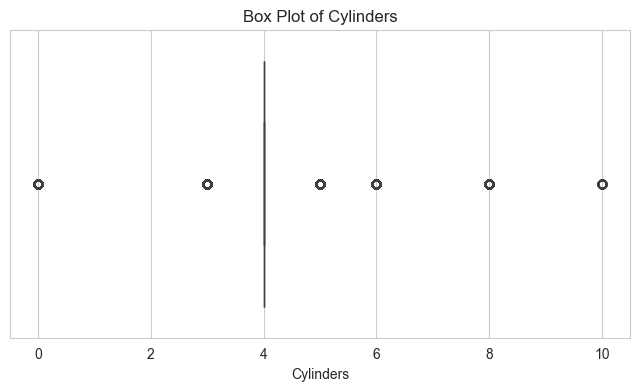

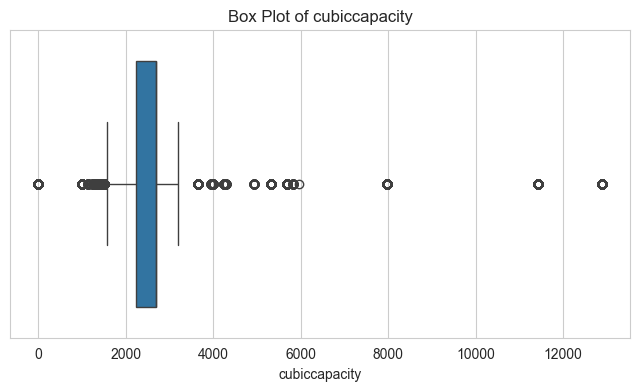

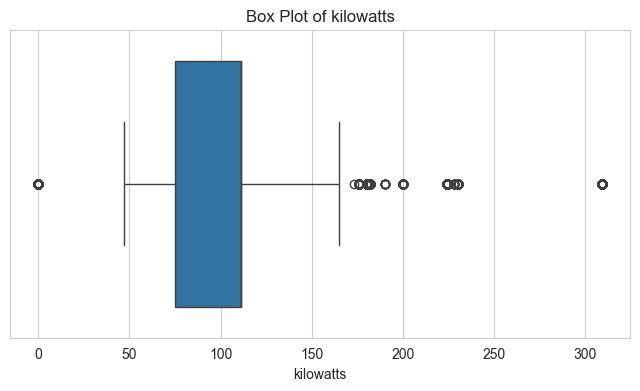

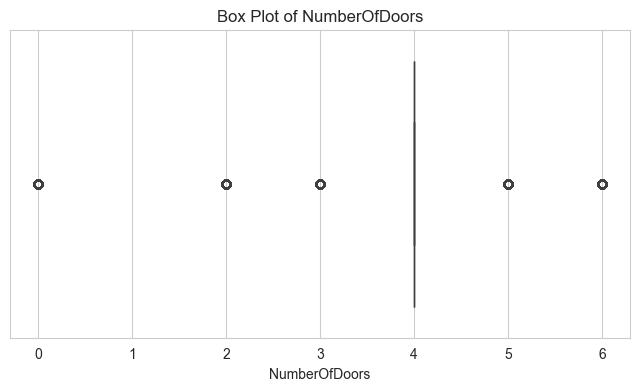

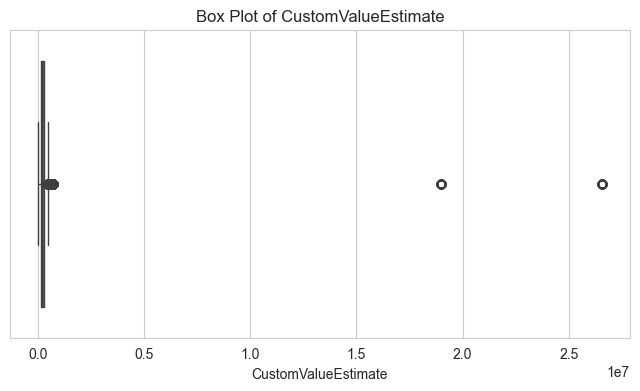

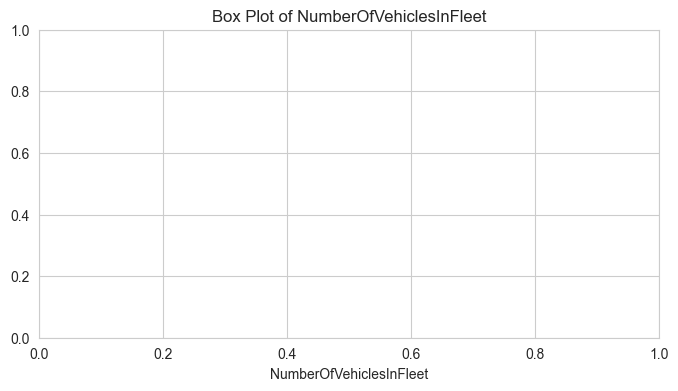

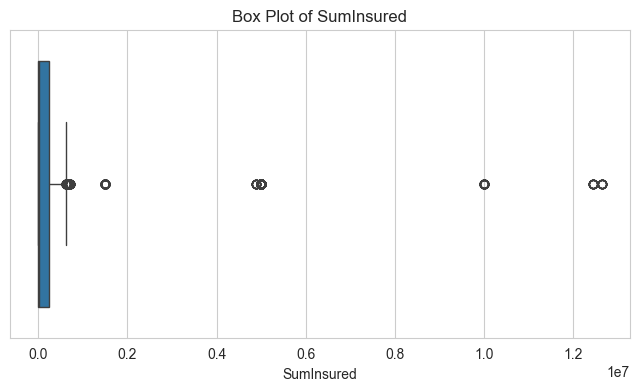

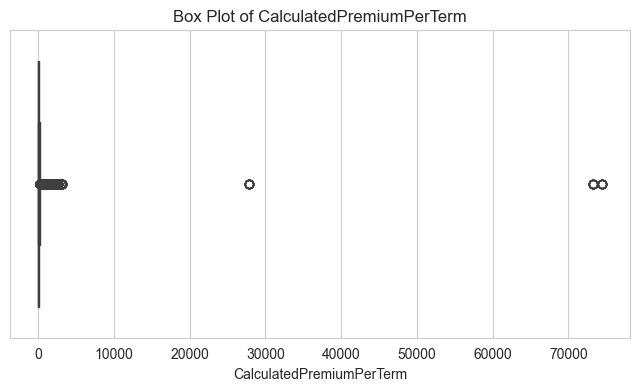

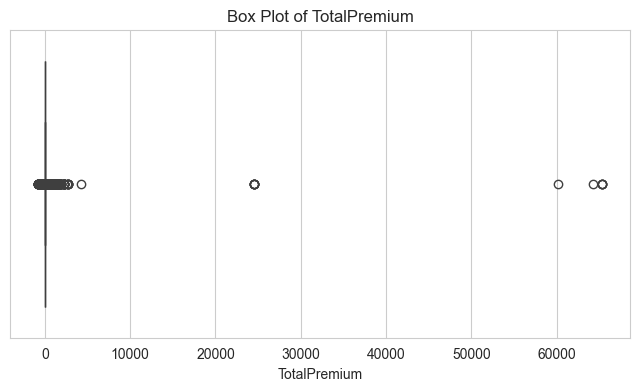

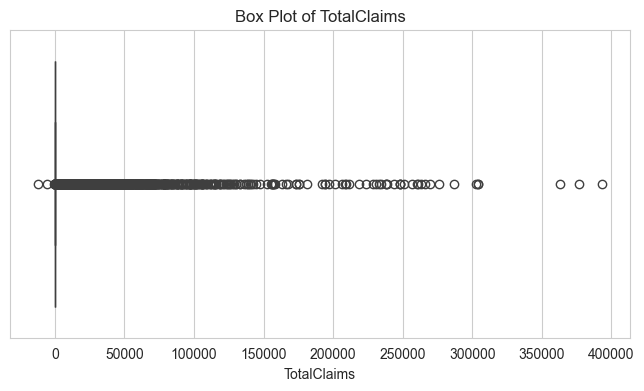

In [19]:
for col in numerical_cols:
    plotter.box_plot(df, column=col)

- A loss ratio of 1.05 means the insurer is paying 5% more in claims than it collects in premiums, indicating the portfolio is operating at a loss.

In [20]:
overall_loss_ratio = df['TotalClaims'].sum() / df['TotalPremium'].sum()
print(f"Overall Loss Ratio: {overall_loss_ratio:.2f}")

Overall Loss Ratio: 1.05


- Gauteng, KwaZulu-Natal, and Western Cape are operating at a loss with loss ratios above 1, while all other provinces are profitable with Northern Cape being the most profitable region.

In [21]:
province_loss_ratio = df.groupby('Province').agg({
    'TotalClaims': 'sum',
    'TotalPremium': 'sum'
})

province_loss_ratio['LossRatio'] = province_loss_ratio['TotalClaims'] / province_loss_ratio['TotalPremium']
province_loss_ratio = province_loss_ratio.sort_values(by='LossRatio', ascending=False)
print(province_loss_ratio)


                TotalClaims  TotalPremium  LossRatio
Province                                            
Gauteng        2.939415e+07  2.405377e+07   1.222018
KwaZulu-Natal  1.430138e+07  1.320908e+07   1.082693
Western Cape   1.038977e+07  9.806559e+06   1.059472
North West     5.920250e+06  7.490508e+06   0.790367
Mpumalanga     2.044675e+06  2.836292e+06   0.720897
Free State     3.549223e+05  5.213632e+05   0.680758
Limpopo        1.016477e+06  1.537324e+06   0.661199
Eastern Cape   1.356427e+06  2.140104e+06   0.633813
Northern Cape  8.949051e+04  3.165581e+05   0.282699


- Heavy and medium commercial vehicles, along with passenger vehicles, are operating at a loss with loss ratios above 1, while light commercial vehicles and buses are highly profitable with very low loss ratios.

In [22]:
vehicle_loss_ratio = df.groupby('VehicleType').agg({
    'TotalClaims': 'sum',
    'TotalPremium': 'sum'
})

vehicle_loss_ratio['LossRatio'] = vehicle_loss_ratio['TotalClaims'] / vehicle_loss_ratio['TotalPremium']
vehicle_loss_ratio = vehicle_loss_ratio.sort_values(by='LossRatio', ascending=False)
print(vehicle_loss_ratio)


                    TotalClaims  TotalPremium  LossRatio
VehicleType                                             
Heavy Commercial   7.504746e+05  4.609479e+05   1.628112
Medium Commercial  4.119867e+06  3.922746e+06   1.050251
Passenger Vehicle  5.937207e+07  5.664202e+07   1.048198
Light Commercial   6.045250e+04  2.604975e+05   0.232066
Bus                7.996535e+03  5.824474e+04   0.137292


- Claims exceed premiums for the “Not specified” group, while both males and females are profitable with females showing the lowest loss ratio.

In [23]:
gender_loss_ratio = df.groupby('Gender').agg({
    'TotalClaims': 'sum',
    'TotalPremium': 'sum'
})

gender_loss_ratio['LossRatio'] = gender_loss_ratio['TotalClaims'] / gender_loss_ratio['TotalPremium']
gender_loss_ratio = gender_loss_ratio.sort_values(by='LossRatio', ascending=False)
print(gender_loss_ratio)

                TotalClaims  TotalPremium  LossRatio
Gender                                              
Not specified  6.271410e+07  5.920275e+07   1.059311
Male           1.396704e+06  1.580143e+06   0.883910
Female         2.502461e+05  3.044806e+05   0.821879


- TotalPremium and CalculatedPremiumPerTerm have a correlation of 0.635987. UnderwrittenCoverID and PolicyID have a correlation of 0.916324.

In [24]:
# Select all numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Display the correlation matrix
print(corr_matrix)

                          UnderwrittenCoverID  PolicyID  PostalCode    mmcode  \
UnderwrittenCoverID                  1.000000  0.916324   -0.018206  0.083310   
PolicyID                             0.916324  1.000000   -0.034186  0.074428   
PostalCode                          -0.018206 -0.034186    1.000000  0.100995   
mmcode                               0.083310  0.074428    0.100995  1.000000   
RegistrationYear                     0.065886  0.067192    0.009472 -0.088748   
Cylinders                           -0.026910 -0.028551   -0.042656 -0.100871   
cubiccapacity                        0.084892  0.088083   -0.139570  0.196766   
kilowatts                           -0.038613 -0.032198   -0.195637  0.033500   
NumberOfDoors                       -0.023781 -0.031438    0.083857  0.021488   
CustomValueEstimate                  0.006728  0.005268   -0.014861 -0.003286   
NumberOfVehiclesInFleet                   NaN       NaN         NaN       NaN   
SumInsured                  

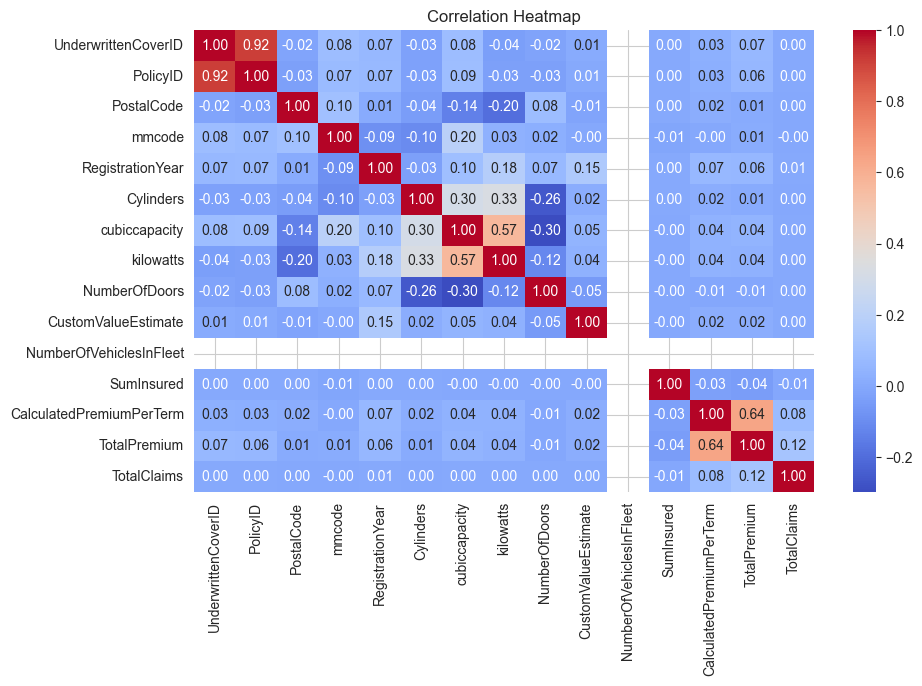

In [25]:
plotter.heatmap(df[numerical_cols])

- The Natal (Durban) and Johannesburg zones have the highest average claims, indicating these areas carry the greatest risk. In contrast, zones like Langkloof, Coast 2, Coast 1 show very low claims despite moderate premiums, suggesting lower risk or potential overpricing in these regions.

In [26]:
main_zone_summary = df.groupby('MainCrestaZone').agg({
    'TotalPremium': 'mean',
    'TotalClaims': 'mean'
}).sort_values('TotalClaims', ascending=False)

print(main_zone_summary)

                                             TotalPremium  TotalClaims
MainCrestaZone                                                        
Natal (Durban)                                  80.658932   104.113272
Johannesburg                                    64.886860    82.174105
Transvaal (Pretoria)                            58.915860    74.877740
Cape Province (Cape Town)                       58.235594    73.840389
Natal                                           74.913326    66.346516
Cape Province (East and North of Cape Town)     63.394790    65.739699
Port Elizabeth                                  48.919625    51.102625
Transvaal (all except Pretoria)                 55.382564    48.482553
Rand East                                       51.741402    48.349554
Tembu 2, Cape Mid 2, Cape Mid West, Tembu 1     67.026914    46.411459
Oranje Free State                               65.053190    43.554089
Karoo 1 (Northeast of Cape Town)                54.697490    38.365913
Ciskei

- Natal Cape stands out as the most high-risk subzone, with extremely high average claims far exceeding its premium, signaling potential underwriting exposure. Other Natal-area subzones like Durban and Pondo also show elevated claims relative to premiums, highlighting a concentrated regional risk.

In [27]:
sub_zone_summary = df.groupby('SubCrestaZone').agg({
    'TotalPremium': 'mean',
    'TotalClaims': 'mean'
}).sort_values('TotalClaims', ascending=False)

print(sub_zone_summary)

                      TotalPremium  TotalClaims
SubCrestaZone                                  
Natal Cape              100.660044   276.101613
Durban                   80.658932   104.113272
Pondo                    60.147037   101.669915
Natal 3                  83.355182    97.102706
Johannesburg             64.886860    82.174105
Karoo 1                  70.885040    80.161147
Rand West                57.468907    79.242104
Pretoria                 58.915860    74.877740
South Coast              80.141439    73.999773
Cape Town                58.235594    73.840389
Natal 1                  86.853546    73.007196
Transvaal South          60.122067    71.960528
Drakensberg              65.768481    66.203675
Highveld                 70.857253    65.989481
East and North of        63.394790    65.739699
North Coast              70.912477    65.212924
Cape Mid West            73.686494    60.489069
Port Elizabeth           48.919625    51.102625
Rand East                51.741402    48

- The data shows that TOYOTA dominates total claims, particularly the QUANTUM series, indicating these models are the costliest in terms of claims. In contrast, brands like FORD, DAIHATSU, CITROEN, CHERY, and VOLVO have negligible or zero claims, highlighting a significant disparity in risk exposure across vehicle makes and models.

In [28]:
# By Make
make_claims = df.groupby('make')['TotalClaims'].sum().sort_values(ascending=False)
print("Top 5 vehicle makes with highest total claims:")
print(make_claims.head())

print("\nTop 5 vehicle makes with lowest total claims:")
print(make_claims.tail())

# By Make + Model
model_claims = df.groupby(['make','Model'])['TotalClaims'].sum().sort_values(ascending=False)
print("\nTop 5 vehicle make/models with highest total claims:")
print(model_claims.head())

print("\nTop 5 vehicle make/models with lowest total claims:")
print(model_claims.tail())


Top 5 vehicle makes with highest total claims:
make
TOYOTA            5.174611e+07
MERCEDES-BENZ     2.938695e+06
VOLKSWAGEN        1.839180e+06
CMC               1.323616e+06
GOLDEN JOURNEY    1.246583e+06
Name: TotalClaims, dtype: float64

Top 5 vehicle makes with lowest total claims:
make
FORD                                   0.0
DAIHATSU                               0.0
CITROEN                                0.0
CHERY                                  0.0
VOLVO                                  0.0
Name: TotalClaims, dtype: float64

Top 5 vehicle make/models with highest total claims:
make    Model                         
TOYOTA  QUANTUM 2.7 SESFIKILE 16s         1.203750e+07
        QUANTUM 2.7 SESFIKILE 15s         1.151173e+07
        QUANTUM 2.7 SESFIKILE 14s         9.967764e+06
        QUANTUM 2.5 D-4D SESFIKILE 16s    7.733236e+06
        HiACE SUPER 16 F/Lift             3.275205e+06
Name: TotalClaims, dtype: float64

Top 5 vehicle make/models with lowest total claims:
mak

Temporal trends

- The Monthly Claim Frequency chart shows a significant upward trend in the number of claims, peaking around March/April 2015 at close to 350, followed by a sharp decline in the last plotted months, indicating a potential major event or policy change occurred during this period.

- The Monthly Claim Severity (Average per Claim) chart displays high variability with a strong upward spike in the final month shown, suggesting that while the number of claims was decreasing at the end of the period, the cost of the average claim was increasing dramatically.

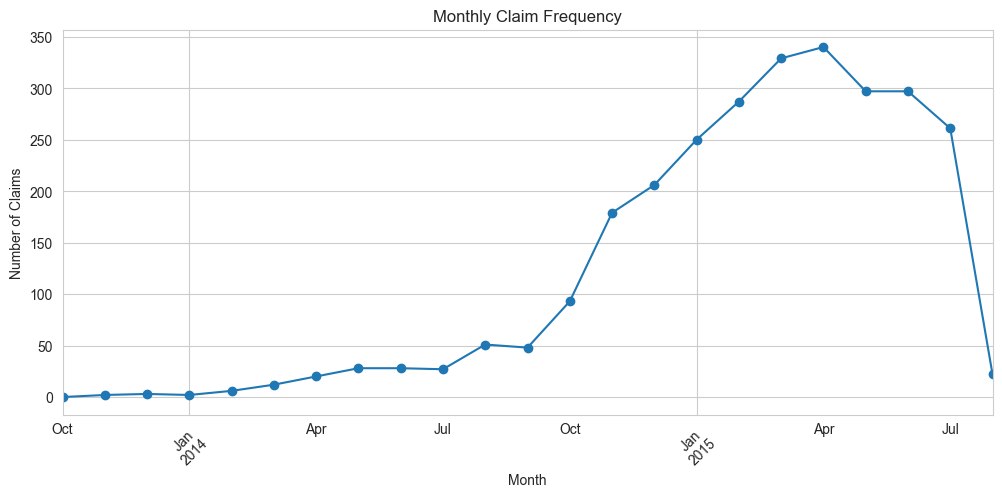

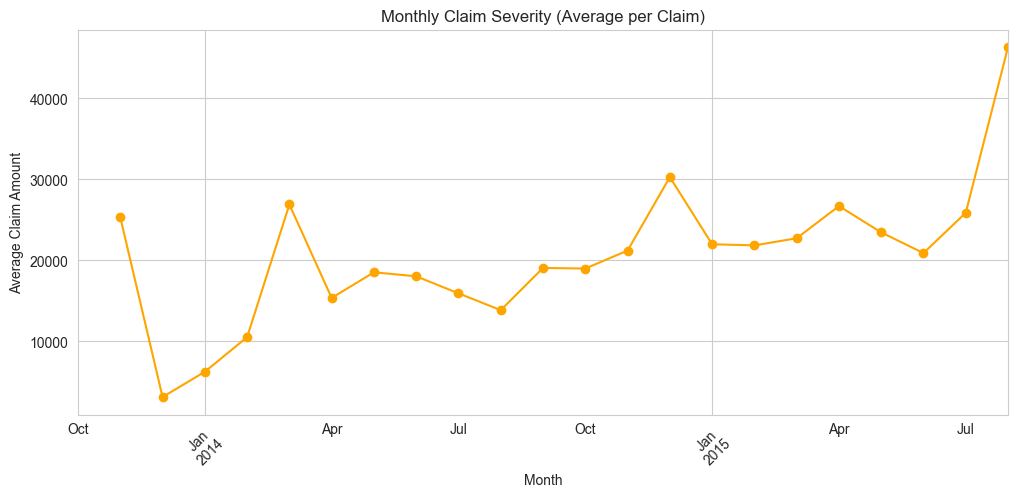

In [40]:
# Convert TransactionMonth to datetime
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

# Extract Year-Month
df['YearMonth'] = df['TransactionMonth'].dt.to_period('M')

# Claim frequency: number of claims per month
monthly_freq = df.groupby('YearMonth')['TotalClaims'].apply(lambda x: (x>0).sum())

# Claim severity: average claim amount per claim
monthly_severity = df.groupby('YearMonth')['TotalClaims'].apply(lambda x: x[x>0].mean())

# Plot frequency
plt.figure(figsize=(12,5))
monthly_freq.plot(marker='o')
plt.title('Monthly Claim Frequency')
plt.ylabel('Number of Claims')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

# Plot severity
plt.figure(figsize=(12,5))
monthly_severity.plot(marker='o', color='orange')
plt.title('Monthly Claim Severity (Average per Claim)')
plt.ylabel('Average Claim Amount')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()


Data Comparison

In [42]:
# 1️⃣ Calculate Average Premium by MainCrestaZone and CoverType
# -----------------------------
avg_premium = df.groupby(['MainCrestaZone','CoverType'])['TotalPremium'].mean().reset_index()
avg_premium.rename(columns={'TotalPremium':'AveragePremium'}, inplace=True)

# Optional: Pivot for better visualization
pivot_premium = avg_premium.pivot(index='MainCrestaZone', columns='CoverType', values='AveragePremium')

print(pivot_premium)

CoverType                                    Accidental Death  \
MainCrestaZone                                                  
Cape Province                                       22.761878   
Cape Province (Cape Town)                           23.831164   
Cape Province (East and North of Cape Town)         27.659602   
Ciskei, Cape Mid 1                                  31.962952   
East London                                         33.142070   
Johannesburg                                        38.252258   
Karoo 1 (Northeast of Cape Town)                    30.922300   
Langkloof, Coast 2, Coast 1                         26.388675   
Natal                                               26.794947   
Natal (Durban)                                      29.801440   
Oranje Free State                                   30.206507   
Port Elizabeth                                      18.893340   
Rand East                                           16.258616   
Tembu 2, Cape Mid 2, Cape

<Figure size 2200x1000 with 0 Axes>

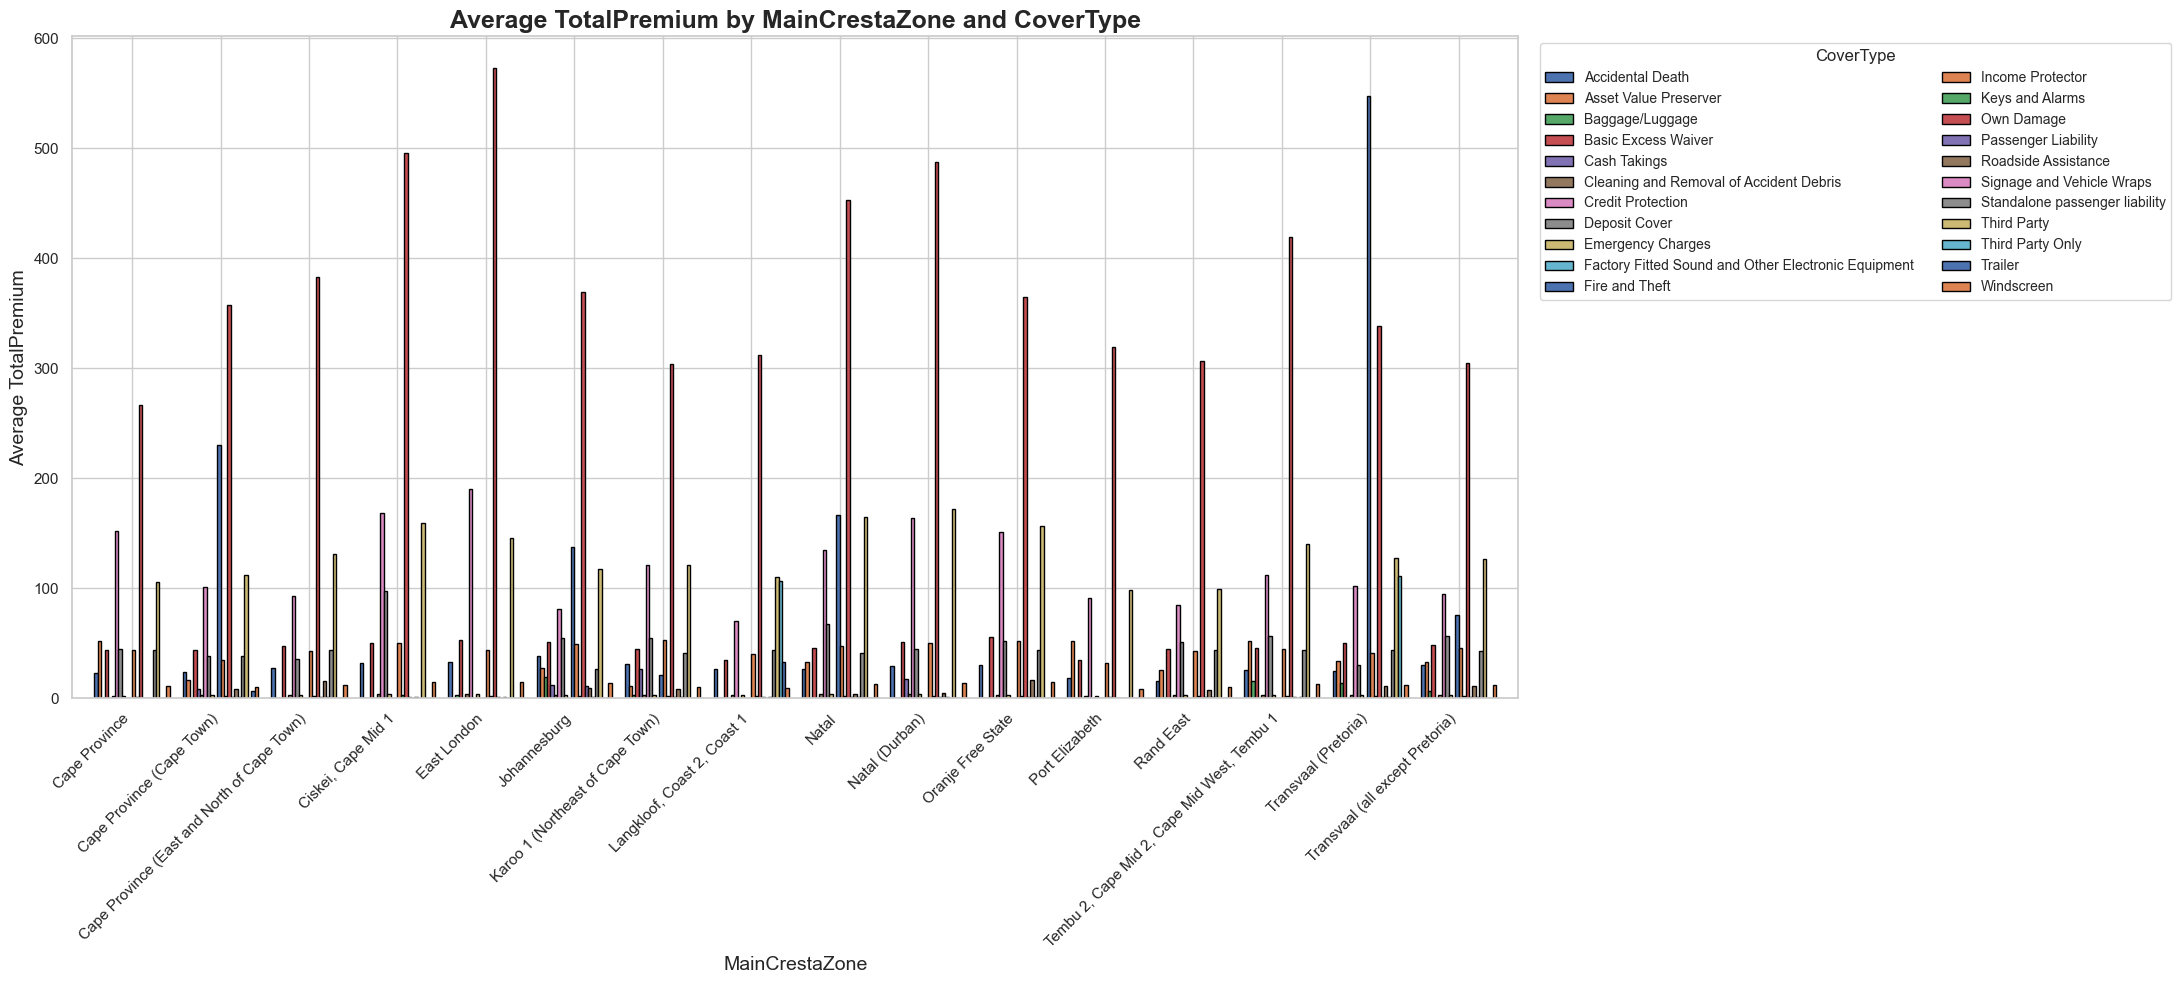

In [45]:
# -----------------------------
# 2️⃣ Enhanced Grouped Bar Chart
# -----------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 10))  # Larger figure for many bars

ax = pivot_premium.plot(
    kind='bar',
    figsize=(22, 10),
    width=0.85,           # Slightly wider bars
    edgecolor='black'     # Improves bar separation
)

# Titles & labels
plt.title('Average TotalPremium by MainCrestaZone and CoverType', fontsize=18, weight='bold')
plt.xlabel('MainCrestaZone', fontsize=14)
plt.ylabel('Average TotalPremium', fontsize=14)

# Rotate x-labels for readability
plt.xticks(rotation=45, ha='right', fontsize=11)

# Improve legend: multiple columns & smaller font
plt.legend(
    title='CoverType',
    title_fontsize=12,
    fontsize=10,
    ncol=2,               # Adjust columns based on how many cover types you have
    frameon=True,
    loc='upper left',
    bbox_to_anchor=(1.01, 1)  # Move outside plot
)

plt.tight_layout()
plt.show()


In [49]:
# 2. Total Claims by Vehicle Make per MainCrestaZone
claims_by_make_zone = df.groupby(['MainCrestaZone', 'make'])['TotalClaims'].sum().unstack(fill_value=0)
print(claims_by_make_zone)

make                                                  AUDI          B.A.W  \
MainCrestaZone                                                              
Cape Province                                  2443.412281       0.000000   
Cape Province (Cape Town)                         0.000000   34377.192982   
Cape Province (East and North of Cape Town)       0.000000       0.000000   
Ciskei, Cape Mid 1                                0.000000       0.000000   
East London                                       0.000000       0.000000   
Johannesburg                                 718675.923158       0.000000   
Karoo 1 (Northeast of Cape Town)                  0.000000       0.000000   
Langkloof, Coast 2, Coast 1                       0.000000       0.000000   
Natal                                         11477.666667       0.000000   
Natal (Durban)                                    0.000000  251055.877193   
Oranje Free State                                 0.000000       0.000000   

<Figure size 2200x1000 with 0 Axes>

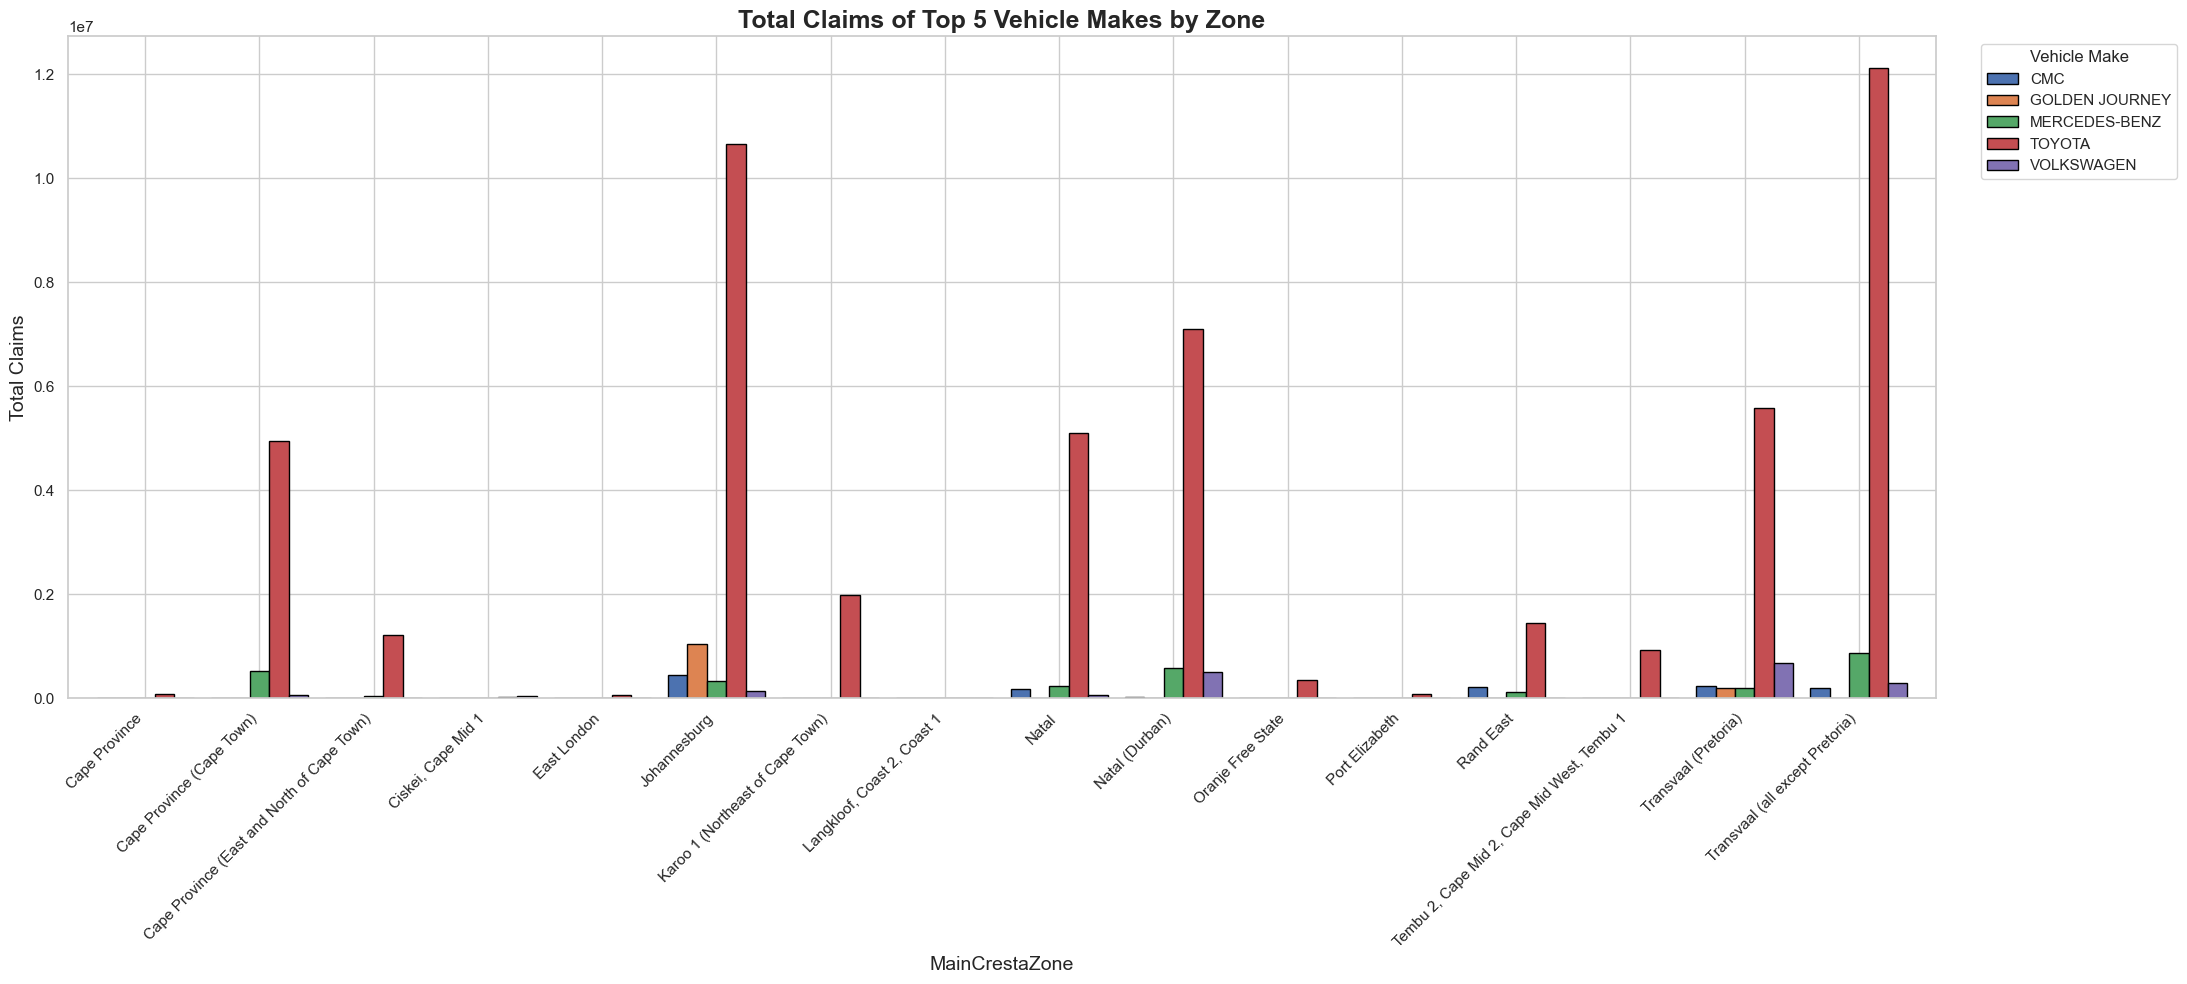

In [50]:
# Plot top 5 makes by total claims per zone
top_makes = (
    df.groupby('make')['TotalClaims']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

claims_top_makes = (
    df[df['make'].isin(top_makes)]
    .groupby(['MainCrestaZone','make'])['TotalClaims']
    .sum()
    .unstack(fill_value=0)
)

# -----------------------------
# Enhanced visualization
# -----------------------------
plt.figure(figsize=(22, 10))  # Larger figure to fit long zone names

ax = claims_top_makes.plot(
    kind='bar',
    figsize=(22, 10),
    width=0.85,
    edgecolor='black'
)

# Title & axis labels
plt.title('Total Claims of Top 5 Vehicle Makes by Zone', fontsize=18, weight='bold')
plt.ylabel('Total Claims', fontsize=14)
plt.xlabel('MainCrestaZone', fontsize=14)

# Rotate labels for readability
plt.xticks(rotation=45, ha='right', fontsize=11)

# Move legend outside & use multiple columns
plt.legend(
    title='Vehicle Make',
    title_fontsize=12,
    fontsize=11,
    ncol=1,
    frameon=True,
    loc='upper left',
    bbox_to_anchor=(1.02, 1)
)

plt.tight_layout()
plt.show()

In [52]:
# 3. Trend over SubCrestaZone: Average Premium and Claims
subzone_summary = df.groupby('SubCrestaZone').agg({
    'TotalPremium': 'mean',
    'TotalClaims': 'mean'
}).sort_values('TotalClaims', ascending=False)
print(subzone_summary)

                      TotalPremium  TotalClaims
SubCrestaZone                                  
Natal Cape              100.660044   276.101613
Durban                   80.658932   104.113272
Pondo                    60.147037   101.669915
Natal 3                  83.355182    97.102706
Johannesburg             64.886860    82.174105
Karoo 1                  70.885040    80.161147
Rand West                57.468907    79.242104
Pretoria                 58.915860    74.877740
South Coast              80.141439    73.999773
Cape Town                58.235594    73.840389
Natal 1                  86.853546    73.007196
Transvaal South          60.122067    71.960528
Drakensberg              65.768481    66.203675
Highveld                 70.857253    65.989481
East and North of        63.394790    65.739699
North Coast              70.912477    65.212924
Cape Mid West            73.686494    60.489069
Port Elizabeth           48.919625    51.102625
Rand East                51.741402    48

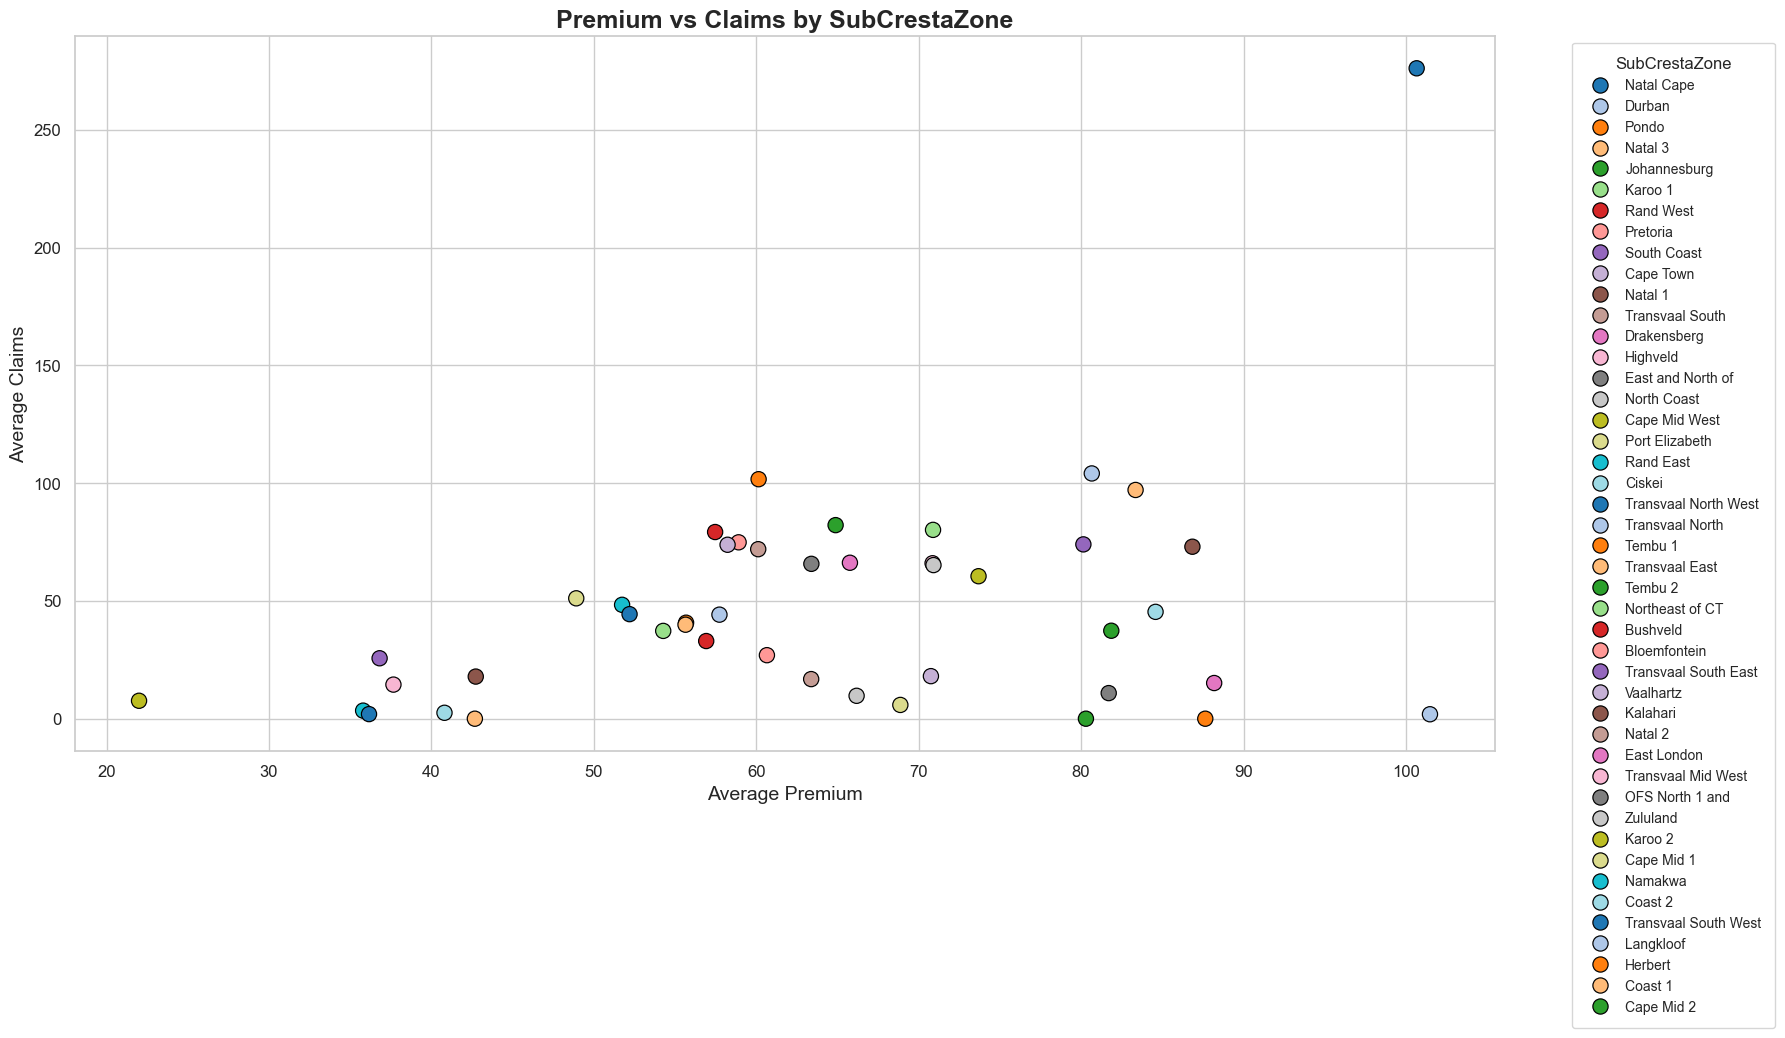

In [53]:
plt.figure(figsize=(18, 10))

# Use better palette & clearer styling
ax = sns.scatterplot(
    data=subzone_summary,
    x='TotalPremium',
    y='TotalClaims',
    hue='SubCrestaZone',
    palette='tab20',      # Better categorical palette
    s=120,                # Larger points
    edgecolor='black'
)

plt.title('Premium vs Claims by SubCrestaZone', fontsize=18, weight='bold')
plt.xlabel('Average Premium', fontsize=14)
plt.ylabel('Average Claims', fontsize=14)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Move legend to the right & add scrollability
plt.legend(
    title='SubCrestaZone',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderpad=1,
    fontsize=10,
    title_fontsize=12,
    ncol=1
)

plt.tight_layout()
plt.show()


Visualization

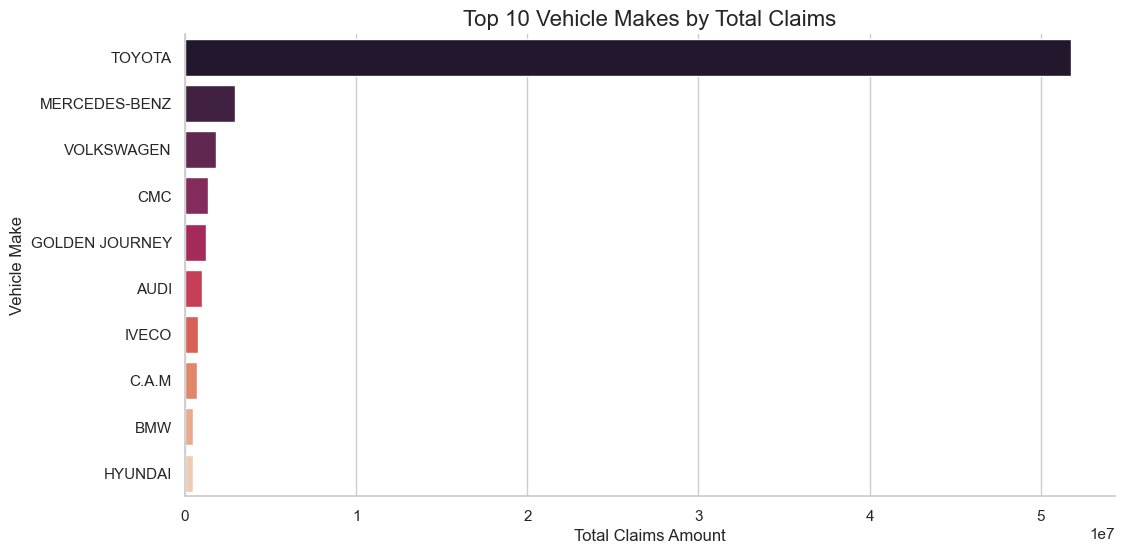

In [55]:
# Top 10 makes by total claims
top_makes = df.groupby('make')['TotalClaims'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_makes.values, y=top_makes.index, palette='rocket')
plt.title('Top 10 Vehicle Makes by Total Claims', fontsize=16)
plt.xlabel('Total Claims Amount')
plt.ylabel('Vehicle Make')
sns.despine()
plt.show()


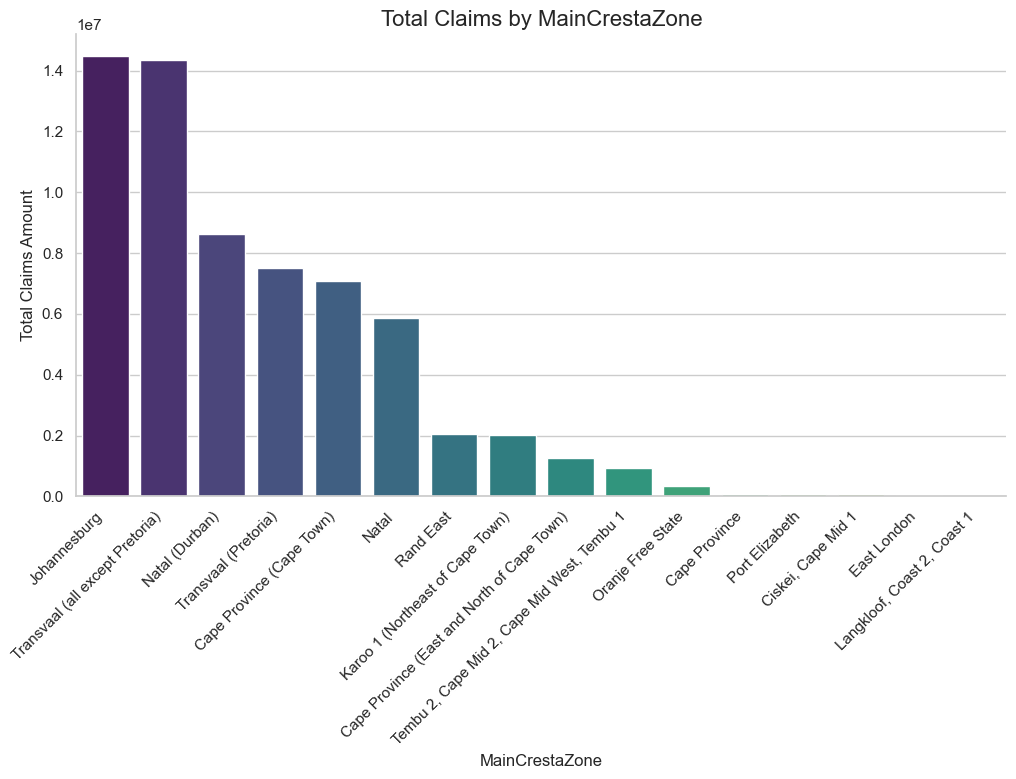

In [56]:
# Aggregate total claims by MainCrestaZone
zone_claims = df.groupby('MainCrestaZone')['TotalClaims'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=zone_claims.index, y=zone_claims.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Total Claims by MainCrestaZone', fontsize=16)
plt.ylabel('Total Claims Amount')
plt.xlabel('MainCrestaZone')
sns.despine()
plt.show()


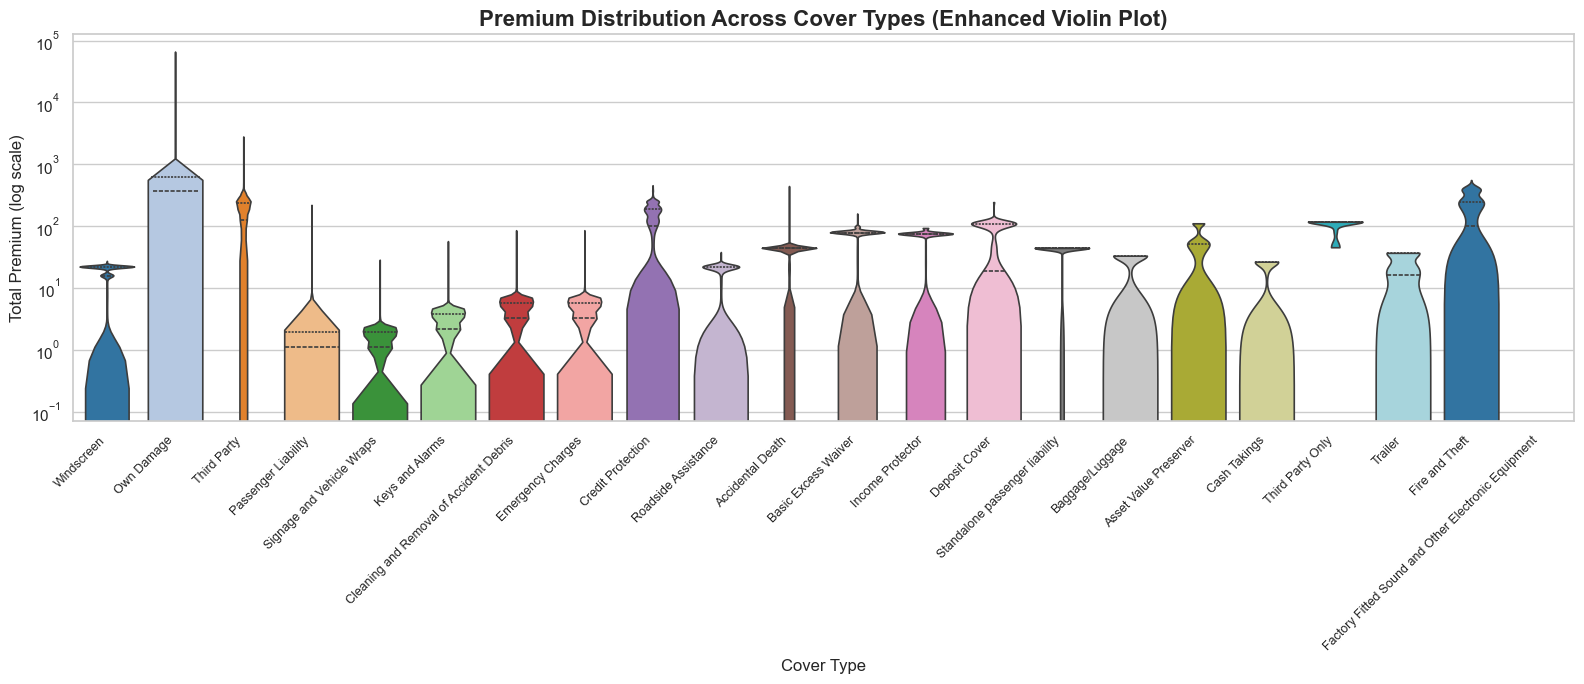

In [60]:
plt.figure(figsize=(16, 7))

# Use a colorful palette
palette = sns.color_palette("tab20", n_colors=df["CoverType"].nunique())

sns.violinplot(
    data=df,
    x="CoverType",
    y="TotalPremium",
    palette=palette,
    cut=0,                    # Don't extend beyond data range
    linewidth=1.2,            # Thicker border
    inner="quartile"          # Draw quartile lines inside each violin
)

# Fix outlier distortion
plt.yscale("log")

# Titles & labels
plt.title("Premium Distribution Across Cover Types (Enhanced Violin Plot)", fontsize=16, weight="bold")
plt.ylabel("Total Premium (log scale)")
plt.xlabel("Cover Type")

# Rotate labels for readability
plt.xticks(rotation=45, ha="right", fontsize=9)

plt.tight_layout()
plt.show()